In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:04<00:00, 276MB/s]
100% 1.06G/1.06G [00:04<00:00, 263MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [ ]:
# using generators to use batches to prevent RAM overload - using 2 generators one for train and other for test
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

testing_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalising the data as the images are in numpy array format, whose value is from 0 to 256, we normalise to 0 to 1
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label
#this function takes image and label as parameter, where the opertaion on image is done to divide the image by 255 and return the image, label.The map function is used to return 1 image and label ata atime and stire in the same train, test. W
#We do this to make all pixel values between 0 and 1 to imporve accuracy
train_ds = train_ds.map(process)
testing_ds = testing_ds.map(process)

In [ ]:
#cnn model is being created in this cell
#3 layers - 32f,64f,128filters
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.add(Dropout(0.1))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_9 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_10 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=testing_ds)

Epoch 1/10
267/625 [===========>..................] - ETA: 32s - loss: 7.6084 - accuracy: 0.5016

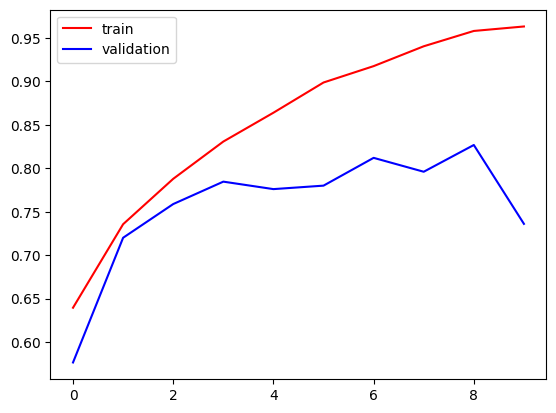

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

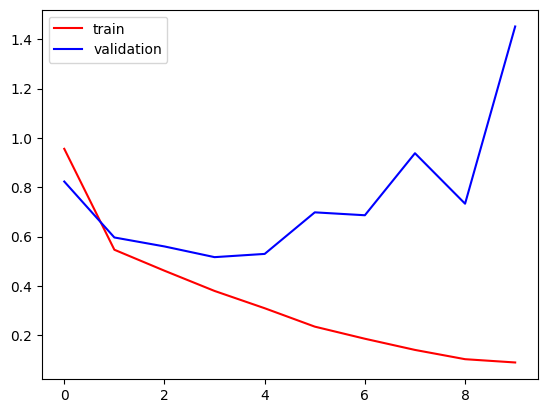

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#We can clearly see that the data is overfittign because the training dataset is performing well, while the testing dataet in not.
#to reduce overfitting, we can :

# Add more data
# Data Augmentation
# L1/L2 Regularisation
# Dropout
# Batch normalisation
# Reduce ceomplexity

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/download (3).png')

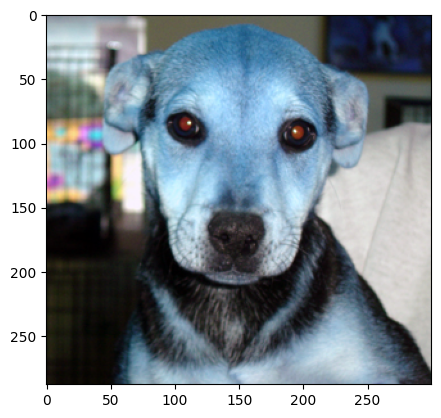

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(288, 300, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_img.shape

(256, 256, 3)

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
test_input.shape

(1, 256, 256, 3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 27ms/step


array([[1.]], dtype=float32)